In [57]:
import numpy as np
import matplotlib.pyplot as plt

# FUNCIONES DE ACTIVACION Y SUS DERIVADAS

## Clases de cada funcion (contiene su funcion y su derivada)

In [58]:
class activationFunction:
    """
    Class for activation functions meant to be used on Neural Networks
    All the activation functions and its derivatives are available on the subclases
    Subclasses:
    Swish()
    Relu()
    Purelin()
    Logsig()
    Tansig()
    Radbas()
    Tribas()
    RadBasN()
    HardLim()
    HardLims()
    SatLin()
    SatLins()
    Softmax()
    LeakyRelu()
    ELU()
    GELU()
    PReLU()
    SELU()
    SiLU()
    Softplus()
    """
    def function(self,x):
        """Activation function"""
        raise NotImplementedError("This is only the base function, the implementation of this is on any of the other functions, for more information check the class DOCSTRING")
    def derivative(self,x):
        """Derivative of the activation function"""
        raise NotImplementedError("This is only the base function, the implementation of this is on any of the other functions, for more information check the class DOCSTRING")
    def active(self):
        raise NotImplementedError("This is only the base function, the implementation of this is on any of the other functions, for more information check the class DOCSTRING")

In [59]:
class Swish(activationFunction):
    """Scaled Exponential Linear Unit With a Shift function"""
    def __init__(self, beta=1):
        self.beta = beta
    def function(self, x):
        return x * (1 / (1 + np.exp(-self.beta * x)))
    def derivative(self, x):
        return (self.beta * self.function(x)) + (1 / (1 + np.exp(-self.beta * x))) * (1 - self.beta * self.function(x))
    def active(self):
        out = [-float('inf'), float('inf')]
        return out

In [60]:
class Relu(activationFunction):
    """Rectified linear unit function (ReLU)"""
    def function(self, x):
        return np.maximum(0,x)
    def derivative(self, x):
        return np.where(x>0,1,0)
    def active(self):
        out = [0, float('inf')]
        return out

In [61]:
class Purelin(activationFunction):
    """Linear (Identity) function"""
    def function(self,x):
      return x
    def derivative(self,x):
      return np.ones_like(x)
    def active(self):
        out = [-float('inf'), float('inf')]
        return out

In [62]:
class Logsig(activationFunction):
    """Logistic function"""
    def function(self, x):
      return 1 / (1 + np.exp(-x))
    def derivative(self,x):
        return self.function(x) * (1 - self.function(x))
    def active(self):
        out = [-4.0, 4.0]
        return out

In [63]:
class Tansig(activationFunction):
    """Hyperbolic function"""
    def function(self,x):
        return np.tanh(x)
    def derivative(self,x):
        return  1- np.tanh(x)**2
    def active(self):
        out = [-2, 2]
        return out

In [64]:
class Radbas(activationFunction):
    """Gaussian function"""
    def function(self,x):
        return np.exp(-x**2)
    def derivative(self,x):
        return -2 * x * np.exp(-x**2)
    def active(self):
        out = [-2, 2]
        return out

In [65]:
class Tribas(activationFunction):
    """Triangular basis function"""
    def function(self, x):
      return np.maximum(0, 1 - np.abs(x))
    def derivative(self, x):
      return np.where(np.abs(x) < 1, -1, 0)
    def active(self):
        out = [-1, 1]
        return out

In [66]:
class RadBasN(activationFunction):
    """Normalized radial basis function"""
    def __init__(self, sigma=1):
        """
        PARAMETERS
        sigma : float by default 1
        """
        self.sigma = sigma

    def function(self, x):
      return np.exp(-0.5 * (x / self.sigma)**2)
    def derivative(self, x):
      return -x / self.sigma**2 * np.exp(-0.5 * (x / self.sigma)**2)
    def active(self):
        out = [-2, 2]
        return out

In [67]:
class HardLim(activationFunction):
    """Hard limit function"""
    def function(self, x):
        return np.where(x >= 0, 1, 0)
    def derivative(self, x):
        return np.zeros_like(x)
    def active(self):
        out = [0, 0]
        return out

In [68]:
class HardLims(activationFunction):
    """Symmetric hard limit function"""
    def function(self, x):
        return np.where(x >= 0, 1, -1)
    def derivative(self, x):
        return np.zeros_like(x)
    def active(self):
        out = [0, 0]
        return out

In [69]:
class SatLin(activationFunction):
    """Saturatin linear function"""
    def function(self, x):
        return np.clip(x, 0, None)

    def derivative(self, x):
        return np.where(x >= 0, 1, 0)
    
    def active(self):
        out = [-0, 1]
        return out

In [70]:
class SatLins(activationFunction):
    """Symmetric saturating function"""
    def function(self, x):
        return np.clip(x, -1, 1)

    def derivative(self, x):
        return np.where(np.logical_and(x >= -1, x <= 1), 1, 0)
    
    def active(self):
        out = [-1, 1]
        return out

In [71]:
class Softmax(activationFunction):
    """Normalized exponential function (softmax)"""
    def function(self, x):
        exps = np.exp(x)
        sums = np.sum(exps)
        return np.divide(exps, sums)
    
    def derivative(self, x):
        raise NotImplementedError("La derivada de Softmax no se utiliza típicamente en el entrenamiento de redes neuronales.")
    
    def active(self):
        out = [-float('inf'), float('inf')]
        return out

In [72]:
class LeakyRelu(activationFunction):
    """Leaky rectified linear unit function (leakyRelu)"""
    def function(self, x):
        return np.where(x>0,x,1e-2*x)
    def derivative(self, x):
        return np.where(x>0,1,1e-2)
    def active(self):
        out = [-float('inf'), float('inf')]
        return out

In [73]:
class ELU(activationFunction):
    """Exponential Linear Unit function (ELU)"""
    def __init__(self, alpha=1):
        """
        PARAMETERS:
        alpha = float by default 1
        """
        self.alpha=alpha
    def function(self, x):
        return np.where(x>0,x,self.alpha*(np.exp(x)-1))
    def derivative(self, x):
        return np.where(x>0,1,self.alpha*np.exp(x))
    def active(self):
        out = [-float('inf'), float('inf')]
        return out

In [74]:
class GELU(activationFunction):
    """Gaussian Error Linear Unit function (GELU)"""
    def function(self, x):
        return 0.5 * x * (1 + erf(x / np.sqrt(2)))
    def derivative(self, x):
        return 0.5 * (1 + erf(x / np.sqrt(2))) + (x / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)
    def active(self):
        out = [-float('inf'), float('inf')]
        return out

In [75]:
class PReLU(activationFunction):
    """Parametric rectified linear unit function (PReLU)"""
    def __init__(self, alpha=1e-1):
        """
        PARAMETERS
        alpha : float by default 1e-1
        """
        self.alpha=alpha
    def function(self, x):
        return np.where(x<0,self.alpha*x,x)
    def derivative(self, x):
        return np.where(x<0,self.alpha,1)
    def active(self):
        out = [-float('inf'), float('inf')]
        return out

In [76]:
class SELU(activationFunction):
    """Scaled exponential linear unit function (SELU)"""
    def __init__(self, lamb= 1.0507, alpha=1.67326):
        """
        PARAMETERS
        lamb : float by default 1.0507
        alpha : float by default 1.67326
        Both are suposed to be always that value so it's recomended to not change them
        """
        self.lamb=lamb
        self.alpha=alpha
    def function(self, x):
        return self.lamb * np.where(x<0, self.alpha*(np.exp(x)-1),x)
    def derivative(self, x):
        return self.lamb * np.where(x<0, self.alpha*np.exp(x),1)
    def active(self):
        out = [-float('inf'), float('inf')]
        return out

In [77]:
class SiLU(activationFunction):
    """Sigmoid linear unit function (SiLU)"""
    def function(self, x):
        return (x / (1 + np.exp(-x)))
    def derivative(self, x):
        return (1 + np.exp(-x) + x*np.exp(-x))/((1+np.exp(-x))**2)
    def active(self):
        out = [-float('inf'), float('inf')]
        return out

In [78]:
class Softplus(activationFunction):
    """Smooth approximation ReLU function"""
    def function(self, x):
        return np.log(1 + np.exp(x))
    def derivative(self, x):
        return 1 / (1+np.exp(-x))
    def active(self):
        out = [-float('inf'), float('inf')]
        return out

# Funciones de error

In [79]:
class ErrorFunctions:
    @staticmethod
    def MSE(y_true, y_pred):
        """
        Calculate the mean squared error between true and predicted values.

        Parameters:
        y_true: numpy.ndarray
            True values
        y_pred: numpy.ndarray
            Predicted values

        Returns:
        float
            Mean squared error
        """
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        return np.mean((y_true - y_pred) ** 2)
    
    @staticmethod
    def MAE(y_true, y_pred):
        """
        Calculate the mean absolute error between true and predicted values.

        Parameters:
        y_true: numpy.ndarray
            True values
        y_pred: numpy.ndarray
            Predicted values

        Returns:
        float
            Mean absolute error
        """
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        return np.mean(np.abs(y_true - y_pred))

    @staticmethod
    def SSE(y_true, y_pred):
        """
        Calculate the sum of squared errors between true and predicted values.

        Parameters:
        y_true: numpy.ndarray
            True values
        y_pred: numpy.ndarray
            Predicted values

        Returns:
        float
            Sum of squared errors
        """
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        return np.sum((y_true - y_pred) ** 2)

# ESTRUCTURA DE LA RED NEURONAL

In [80]:
class NeuralNetwork:
    """Class for the structure of a Neural Network"""
    def __init__(self, input_size:int, layer_sizes:list[int], output_size:int, 
                 activation_funcs:list['activationFunction'], wInit:str='random',
                 dropout_rate:float=0)->None:
        """
        Parameters:
        input_size: int 
            Defines the size of the input layer
        layer_sizes: int array 
            Defines the sizes of the ocult layers
        output_size: int 
            Defines the size of the output layer
        activation_funcs: activationFunction class array 
            Defines the activation function per layer
        """
        self.input_size = input_size
        self.layer_sizes = [input_size] + layer_sizes + [output_size]  # Incluir el tamaño de la capa de entrada y de salida
        self.output_size = output_size
        self.activation_funcs = activation_funcs
        self.dropout_rate = dropout_rate
        self.num_layers = len(self.layer_sizes)
        self.weights = self._initializeWeights(wInit)
        self.n_outputs = []  # Lista para almacenar las salidas antes de la función de activación
        self.a_outputs = []
        self.dropout_masks = []

    
    def _initializeWeights(self, wInit):
        """
        Inicializa los pesos de la red neuronal ya sea de manera random o mediante el metodo nguyen widraw
        
        :return: Lista de matrices de pesos como np.ndarrar
        """
        weights = []
        if wInit == 'random':
            for i in range(self.num_layers - 1):
                W = np.random.randn(self.layer_sizes[i] + 1, self.layer_sizes[i+1]) # +1 para incluir los sesgos
                weights.append(W)
        elif wInit == 'nguyen':
            for i in range(self.num_layers - 1):
                ni = self.layer_sizes[i]
                no = self.layer_sizes[i+1]
                g = (0.7*no) ** (1/ni)
                active = self.activation_funcs[i].active()
                if not np.isinf(active[0]) and not np.isinf(active[1]):
                    W = np.random.randn(no, ni)
                    W = W / np.linalg.norm(W, axis=1, keepdims=True)  # Normalizacion
                    W = g * W
                    beta = np.linspace(active[0], active[1], no).reshape(-1, 1)
                    bias = g * (np.sign(W[:, 0]).reshape(-1, 1) * beta)
                    W = np.hstack([W, bias])
                    weights.append(W.T)
                else:
                    W = g * np.random.randn(ni+1,no)
                    weights.append(W)
        else:
            raise KeyError("No se reconoce el inicializador")
        return np.array(weights, dtype = object)
    
    def forwardPass(self, inputs, training=True):
        A = np.hstack([inputs, np.ones((inputs.shape[0], 1))])
        self.n_outputs = [inputs]
        self.a_outputs = [A]
        self.dropout_masks = []

        for i, weight in enumerate(self.weights):
            Z = np.dot(A, weight)
            self.n_outputs.append(Z)
            A = self.activation_funcs[i].function(Z)
            
            if self.dropout_rate > 0 and training and i < len(self.weights) - 1:  # Dropout en todo menos la ultima capa y solo durante el entrenamiento
                dropout_mask = np.random.binomial(1, 1 - self.dropout_rate, size=A.shape)
                A *= dropout_mask
                self.dropout_masks.append(dropout_mask)
            elif not training and i < len(self.weights) - 1:  # Escalar datos durante la inferencia (no entrenando)
                A *= (1 - self.dropout_rate)
            
            A = np.hstack([A, np.ones((A.shape[0], 1))])
            self.a_outputs.append(A)
        return A[:, :-1]
    """    
    def forwardPass(self, inputs):
        A = np.hstack([inputs,np.ones((inputs.shape[0], 1))])
        self.n_outputs = [inputs] #La primera n siempre es igual a los inputs
        self.a_outputs = [A]
        # Iterar sobre cada capa de la red
        for weight in self.weights:
            # Cálculo del producto punto entre los pesos y el input aumentado por el sesgo
            Z = np.dot(A,weight)
            self.n_outputs.append(Z)
            # Aplicación de la función de activación correspondiente
            A = self.activation_funcs[len(self.a_outputs)-1].function(Z)
            A = np.hstack([A,np.ones((A.shape[0], 1))])
            self.a_outputs.append(A)  
        return A[:,:-1] # TODO MENOS LA COLUMNA AUMENTADA
    """
    def backwardPass(self, targets):
        #gradients = np.array([])
        gradients = []
        e = targets - self.a_outputs[-1][:,:-1]
        ge = -2*e
        delta = ge * self.activation_funcs[-1].derivative(np.array(self.n_outputs[-1]))
        ae = self.a_outputs[-2] #El metodo forward pass deja a_outputs aumentado
        ge = np.dot(ae.T,delta)
        gradients.append(ge)
        
        for i in range(self.num_layers-2, 0, -1): 
            fdx = self.activation_funcs[i].derivative(np.array(self.n_outputs[i]))
            delta = fdx * np.dot(delta,self.weights[i][:-1].T)
            
            if self.dropout_rate > 0 and self.dropout_masks: #Si existe alguna mascara de dropout aplicarla
                delta *= self.dropout_masks.pop()  # Apply dropout mask
            
            ae = self.a_outputs[i-1]
            ge = np.dot(ae.T,delta)
            gradients.insert(0,ge)
        return gradients
            
    def error(self,targets,error_func):
        """
        Calculate the error based on the inputs, outputs, and error function specified.

        Parameters:
        inputs: numpy.ndarray
            Input data
        outputs: numpy.ndarray
            Output data
        error_func: function
            Error function to use (e.g., mean squared error, mean absolute error, etc.)

        Returns:
        float
            Error value calculated using the specified error function.
        """
        predicted_outputs = self.a_outputs[-1][:,:-1]
        return error_func(targets, predicted_outputs)

# Optimizadores

In [81]:
class Optimizer():
    """
    Class for the optimizers based on two different algorithms

    RMSProp()
    AdamW() 
    """
    def __init__(self,lr:float,maxEpochs:int,goal:float,mingrad:float,nn: NeuralNetwork,
                 inputs,targets,error_fun,show:int =1,consecutive_epochs:int =10,
                 num_batch: int=1)->None:  
        self.nn = nn
        self.name = "DEFAULT"
        self.lr = lr
        self.num_batch = num_batch
        self.maxEpochs = maxEpochs
        self.goal = goal
        self.mingrad = mingrad
        self.show = show
        self.inputs = inputs
        self.targets = targets
        self.error_fun = error_fun
        self.consecutive_epochs = consecutive_epochs
        
        
    def optimize(self):
        this = self.name
        stop = ""
        epochs = []
        perfs  = []
        consecutive_rise = 0  # Contador para el número de épocas consecutivas en las que el rendimiento ha subido
        prev_perf = float('inf')
        print("\n")
        # Train
        for epoch in range(self.maxEpochs+1):
            # Performance and Gradient
            _ = self.nn.forwardPass(self.inputs)
            gX = self.nn.backwardPass(self.targets)
            perf = self.nn.error(self.targets, self.error_fun)            
            
            # Aplanar y concatenar los gradientes en un solo vector
            gX_flattened = np.concatenate([grad.flatten() for grad in gX])
            normgX = np.linalg.norm(gX_flattened)  
            #normgX = np.linalg.norm(gX)  
            
            # Stopping criteria
            if np.all(perf <= self.goal):
                stop = "Performance goal met"
            elif epoch == self.maxEpochs:
                stop = "Maximum epoch reached, performance goal was not met"
            elif normgX < self.mingrad:
                stop = "Minimum gradient reached, performance goal was not met"
            elif perf >= prev_perf:
                consecutive_rise += 1
                if consecutive_rise >= self.consecutive_epochs:
                    stop = f"Performance has risen for {self.consecutive_epochs} consecutive epochs"
            elif perf < prev_perf:
                consecutive_rise = 0
    
            prev_perf = perf

            # Progress
            if (np.fmod(epoch,self.show) == 0 or len(stop) != 0):
                print(this,end = ": ")
                if np.isfinite(self.maxEpochs):
                    print("Epoch ",epoch, "/", self.maxEpochs,end = " ")
                if np.isfinite(self.goal):
                    print(", Performance %8.3e" % perf, "/", self.goal, end = " ")
                if np.isfinite(self.mingrad):
                    print(", Gradient %8.3e" % normgX, "/", self.mingrad)

                
                if len(stop) != 0:
                    print("\n",this,":",stop,"\n")
                    break
            epochs = np.append(epochs,epoch)
            perfs = np.append(perfs,perf)
            self.train(gX_flattened)
            
        return perfs, epochs
    def train(self,gX):
        raise NotImplementedError("No se ha definido el optimizador, esta es la clase base")
    
    


In [82]:
class RmsProp(Optimizer):
    def __init__(self, nn: NeuralNetwork, inputs, targets,lr: float =1e-3, num_batch: int =1, maxEpochs: int =500, 
                 goal: float =1e-8,mingrad: float =1e-11, show:int =1, error_fun=ErrorFunctions.SSE, 
                 consecutive_epochs: int=10,WDecay:float=0,alpha:float=0.99,centered:bool=False,
                 momentum:float=0.6,epsilon:float=1e-9) -> None:
        super().__init__(lr,maxEpochs,goal,mingrad,nn,inputs,targets,error_fun,show,consecutive_epochs,num_batch)
        self.name = "trainRMSPROP"
        self.epsilon = epsilon
        self.v = np.zeros_like(np.concatenate([w.flatten() for w in nn.weights]))  # Vector de acumulación de gradientes
        self.vh = 0
        self.b = 0
        self.gAvg = 0
        self.WDecay = WDecay
        self.alpha = alpha
        self.centered = centered
        self.momentum = momentum

    def train(self, gX):        
        if self.WDecay != 0:
            gX = gX + gX*self.WDecay
        self.v = self.alpha*self.v + ((1-self.alpha)*(gX**2))
        self.vh = self.v
        if self.centered:
            self.gAvg = self.gAvg*self.alpha + ((1-self.alpha)*gX)
            self.vh = self.vh - self.gAvg**2
        if self.momentum > 0:
            self.b = self.momentum*self.b + gX/((self.vh**(1/2))+self.epsilon)
            update = self.lr*self.b
            #self.nn.weights += dX
        else:
            update = self.lr*(gX/((self.vh**(1/2))+1e-8))
            #self.nn.weights += dX
        
        # Actualizar pesos
        start = 0
        for i, w in enumerate(self.nn.weights):
            shape = w.shape
            size = np.prod(shape)
            grad_update = update[start:start+size].reshape(shape)
            self.nn.weights[i] -= grad_update
            start += size

# Main

In [83]:
from scipy.io import loadmat

def main():
    activationFunction()
    neural_network = NeuralNetwork(input_size = 2,
                                layer_sizes = [50,50,30],
                                output_size = 2,
                                activation_funcs = [Logsig(),Logsig(),Relu(),Purelin()],
                                wInit = 'nguyen',
                                dropout_rate=0.1)

    # Carga el archivo .mat
    data = loadmat('engine_dataset.mat')
    inputs = data['engineInputs'].T
    targets = data['engineTargets'].T
    for weight in neural_network.weights:
        print(f"Tamano de los pesos: {weight.shape}")
    
    Optimizador = RmsProp(nn=neural_network,
                          inputs=inputs,
                          targets=targets,
                          lr=1e-3,
                          maxEpochs=5000,
                          show=500,
                          consecutive_epochs=10,
                          mingrad=1e-8,
                          error_fun=ErrorFunctions.MSE)
    
    perfs,epochs = Optimizador.optimize()
    
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, perfs)
    plt.title('Performance')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()
    
    #print(f"Pesos despues: {neural_network.weights}")
    outputs = neural_network.forwardPass(inputs)

# DO MAIN

Tamano de los pesos: (3, 50)
Tamano de los pesos: (51, 50)
Tamano de los pesos: (51, 30)
Tamano de los pesos: (31, 2)


trainRMSPROP: Epoch  0 / 5000 , Performance 9.849e+05 / 1e-08 , Gradient 2.308e+08 / 1e-08


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33824\3040260320.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


trainRMSPROP: Epoch  500 / 5000 , Performance 2.628e+05 / 1e-08 , Gradient 2.037e+08 / 1e-08
trainRMSPROP: Epoch  1000 / 5000 , Performance 2.546e+05 / 1e-08 , Gradient 1.392e+08 / 1e-08
trainRMSPROP: Epoch  1500 / 5000 , Performance 2.119e+05 / 1e-08 , Gradient 7.461e+08 / 1e-08
trainRMSPROP: Epoch  2000 / 5000 , Performance 1.807e+05 / 1e-08 , Gradient 3.365e+08 / 1e-08
trainRMSPROP: Epoch  2500 / 5000 , Performance 1.761e+05 / 1e-08 , Gradient 2.408e+09 / 1e-08
trainRMSPROP: Epoch  3000 / 5000 , Performance 1.733e+05 / 1e-08 , Gradient 1.879e+09 / 1e-08
trainRMSPROP: Epoch  3500 / 5000 , Performance 1.769e+05 / 1e-08 , Gradient 2.652e+09 / 1e-08
trainRMSPROP: Epoch  4000 / 5000 , Performance 1.728e+05 / 1e-08 , Gradient 5.718e+08 / 1e-08
trainRMSPROP: Epoch  4500 / 5000 , Performance 1.776e+05 / 1e-08 , Gradient 8.461e+08 / 1e-08
trainRMSPROP: Epoch  5000 / 5000 , Performance 1.747e+05 / 1e-08 , Gradient 1.661e+09 / 1e-08

 trainRMSPROP : Maximum epoch reached, performance goal was 

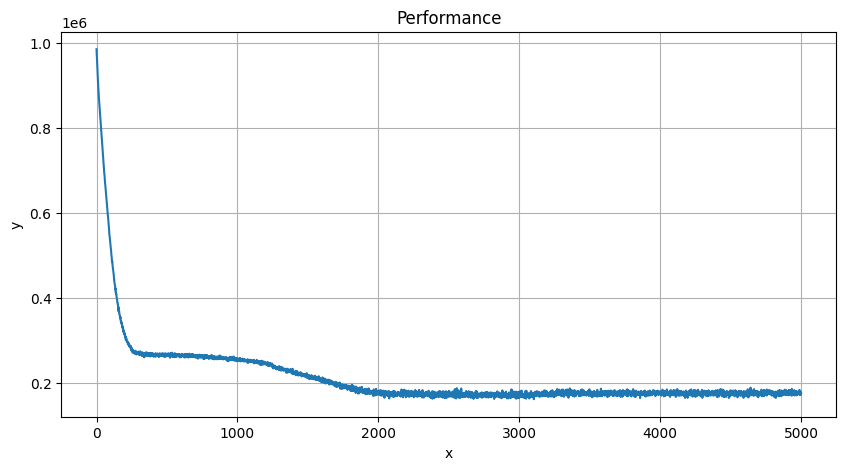

In [84]:
if __name__ == '__main__':
    main()